In [9]:

# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Load the penguins dataset
penguins = sns.load_dataset('penguins')
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:

# Data Preprocessing
# Drop rows with NaN values
penguins_cleaned = penguins.dropna()

# Convert string features to numerical values
penguins_cleaned['species'] = penguins_cleaned['species'].astype('category').cat.codes
penguins_cleaned['island'] = penguins_cleaned['island'].astype('category').cat.codes
penguins_cleaned['sex'] = penguins_cleaned['sex'].astype('category').cat.codes

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(penguins_cleaned, test_size=0.3, random_state=42)

# Print the data sizes
print(f"Number of data points in the whole dataset originally: {len(penguins)}")
print(f"Number of data points in the whole dataset after deleting incomplete data: {len(penguins_cleaned)}")
print(f"Number of data points in the training set after splitting: {len(train_data)}")
print(f"Number of data points in the test set after splitting: {len(test_data)}")




Number of data points in the whole dataset originally: 344
Number of data points in the whole dataset after deleting incomplete data: 333
Number of data points in the training set after splitting: 233
Number of data points in the test set after splitting: 100


C:\Users\31290\AppData\Local\Temp\ipykernel_24236\2396470150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_cleaned['species'] = penguins_cleaned['species'].astype('category').cat.codes
C:\Users\31290\AppData\Local\Temp\ipykernel_24236\2396470150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_cleaned['island'] = penguins_cleaned['island'].astype('category').cat.codes
C:\Users\31290\AppData\Local\Temp\ipykernel_24236\2396470150.py:8: SettingWithCopyWarning: 
A value is trying to b

Q2.1.2 Data Statistics:


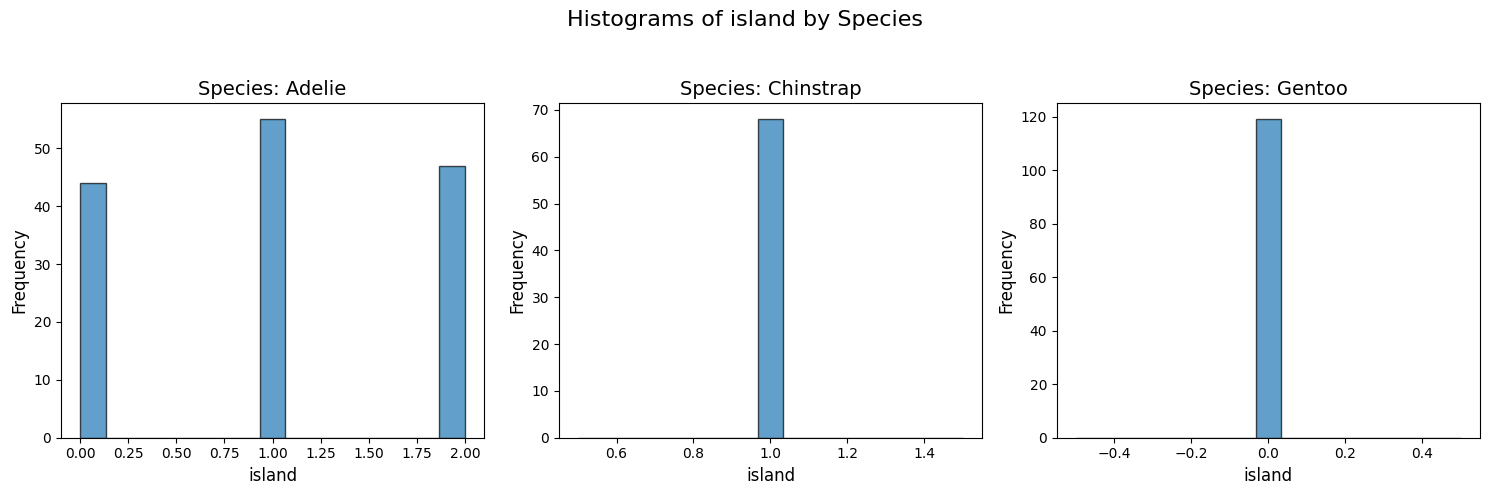

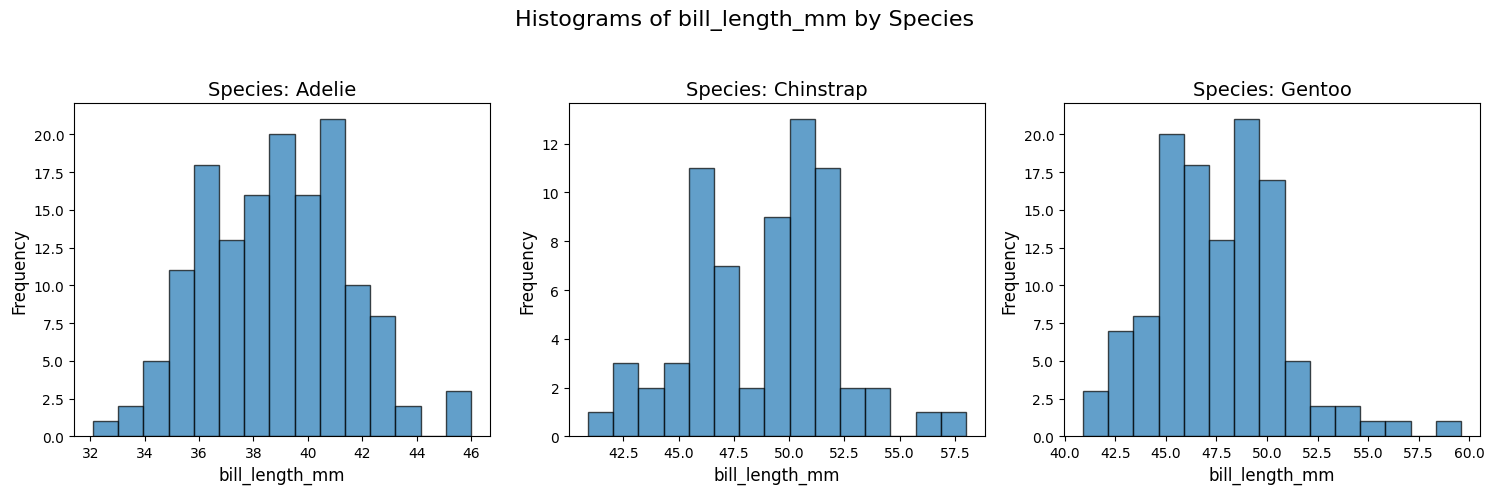

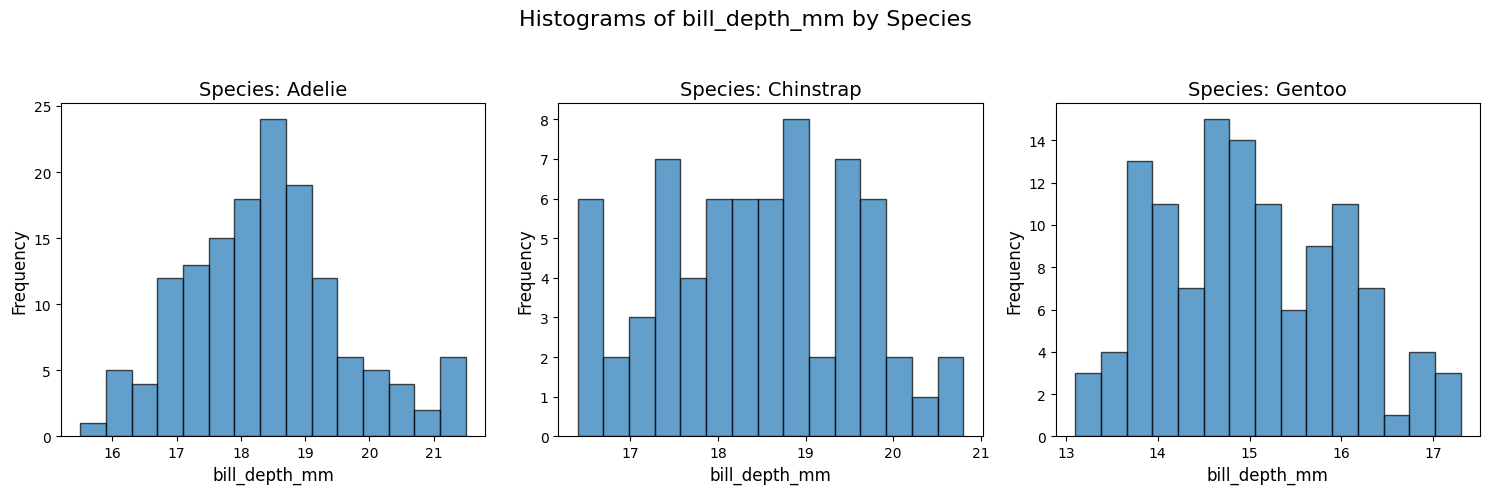

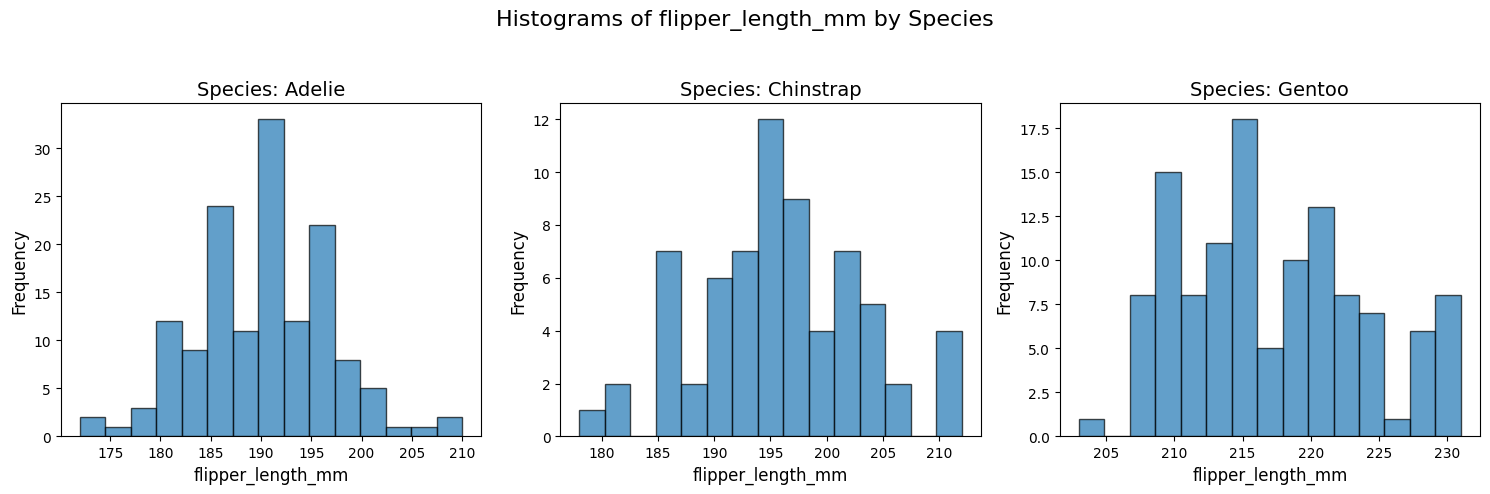

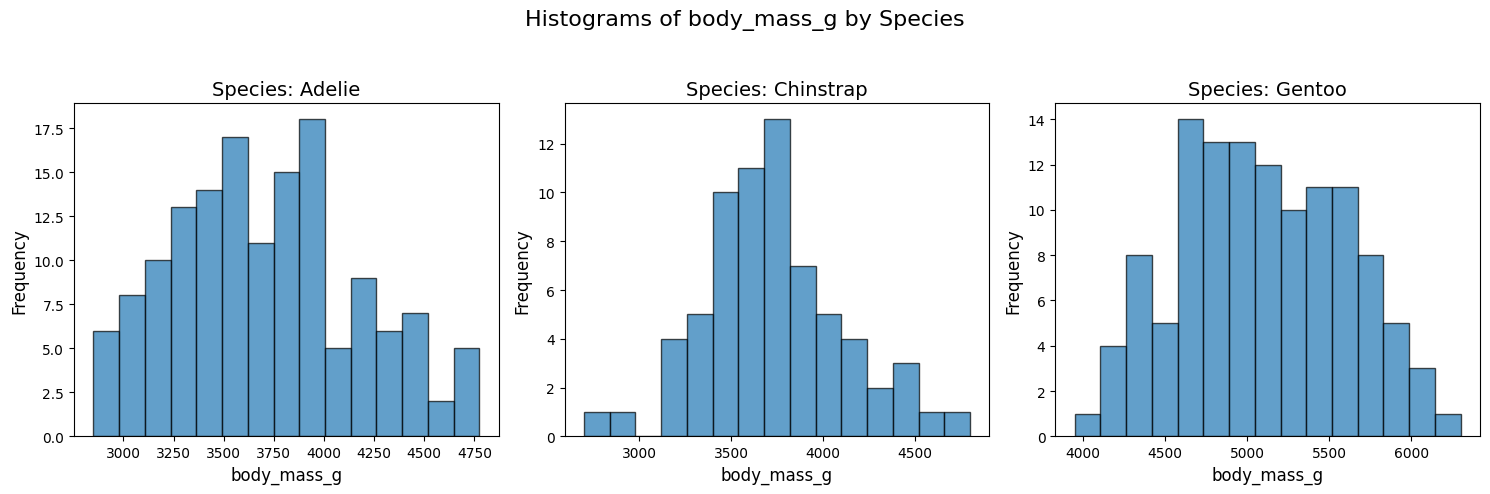

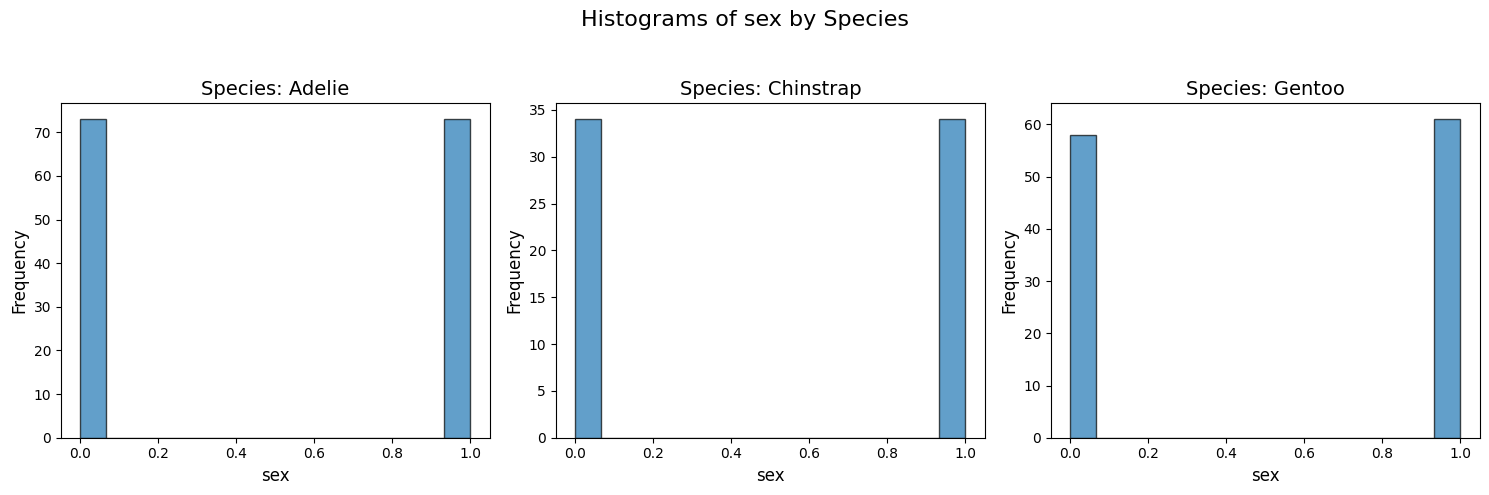

In [11]:

# Features to analyze
features = ['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
species_mapping = {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}  # Map species codes to names

# Generate histograms for each feature across species
print("Q2.1.2 Data Statistics:")

for feature in features:
    # Create subplots for each species
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Histograms of {feature} by Species', fontsize=16)
    
    for i, (species_code, species_name) in enumerate(species_mapping.items()):
        # Subset data for the current species
        subset = penguins_cleaned[penguins_cleaned['species'] == species_code]
        
        # Plot histogram for the feature
        axes[i].hist(subset[feature], bins=15, alpha=0.7, color='tab:blue', edgecolor='black')
        axes[i].set_title(f'Species: {species_name}', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
    
    plt.tight_layout(rect=[0, 0, 1, 0.94])  # Adjust layout to prevent overlap
    plt.show()

Q2.1.3 Decision Tree:
1. Results with maximum depth as 3 and least node size as 5:
Training Accuracy: 0.9571, Test Accuracy: 0.9800
{learned tree figure}


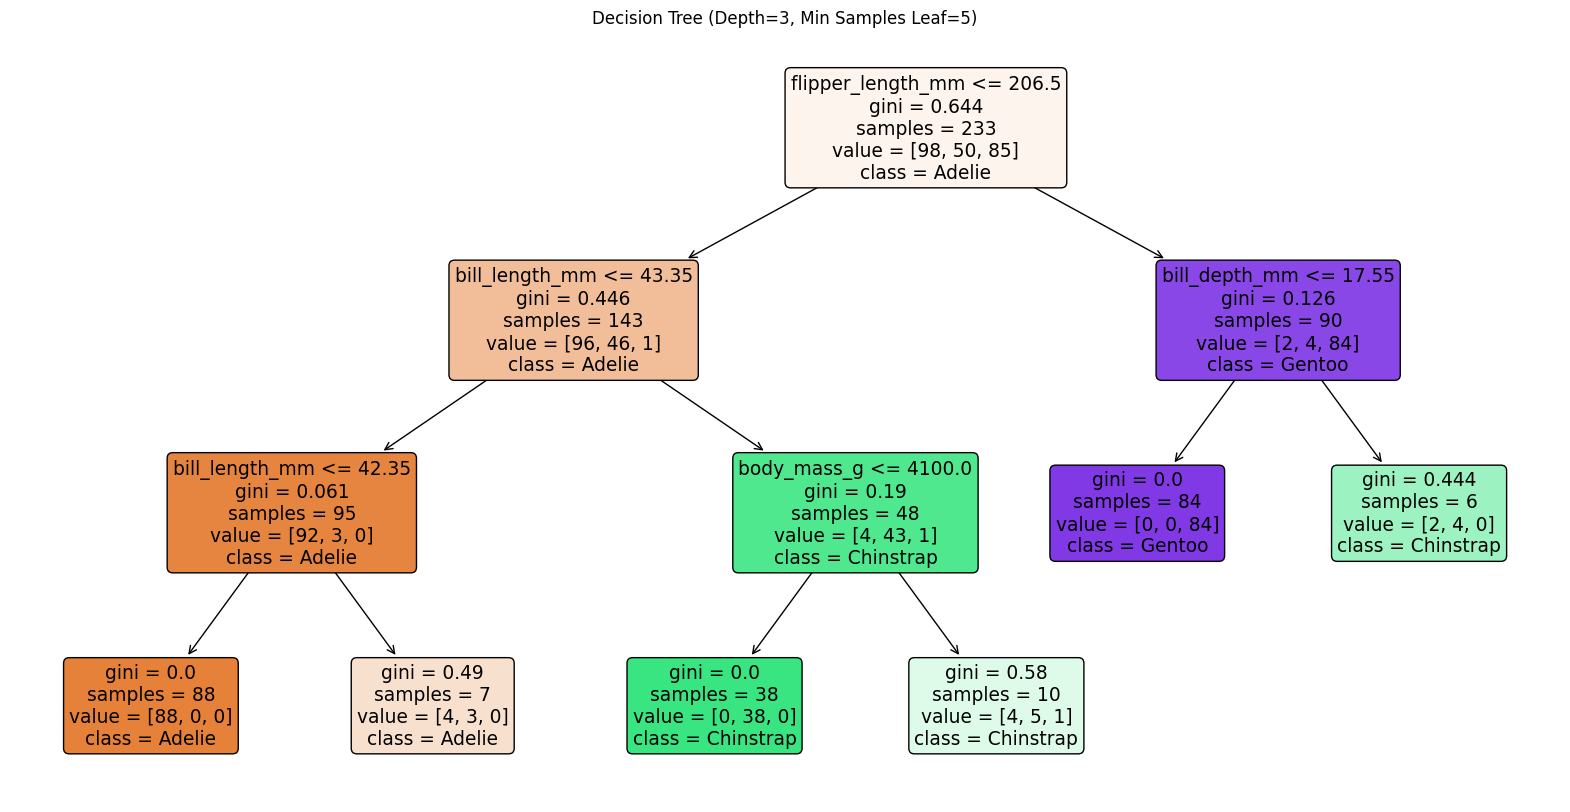

2. Results with maximum depth as 3 and least node size as 10:
Training Accuracy: 0.9399, Test Accuracy: 0.9700
{learned tree figure}


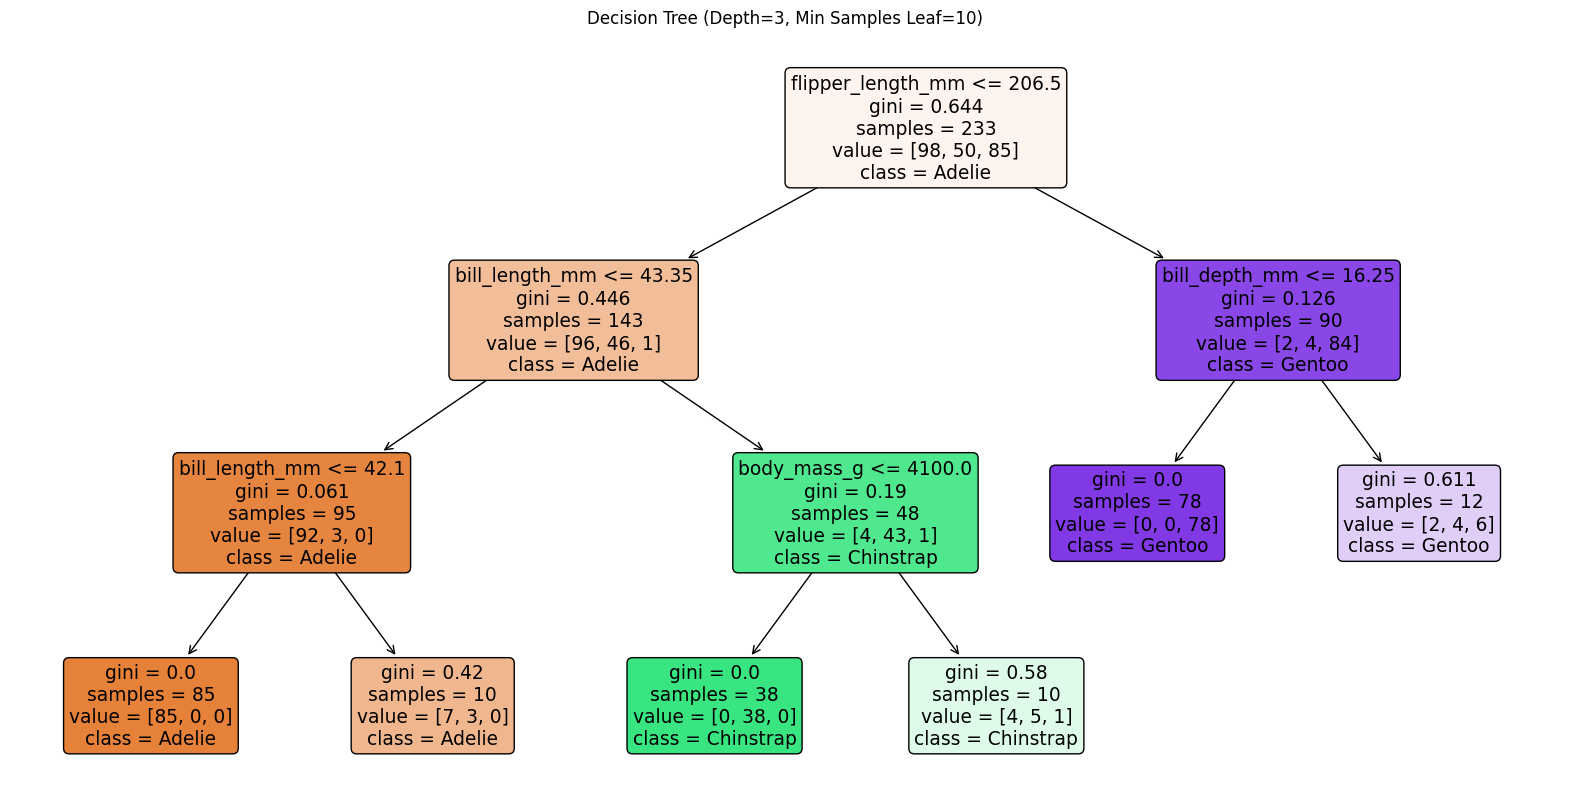

3. Results with maximum depth as 3 and least node size as 15:
Training Accuracy: 0.9399, Test Accuracy: 0.9700
{learned tree figure}


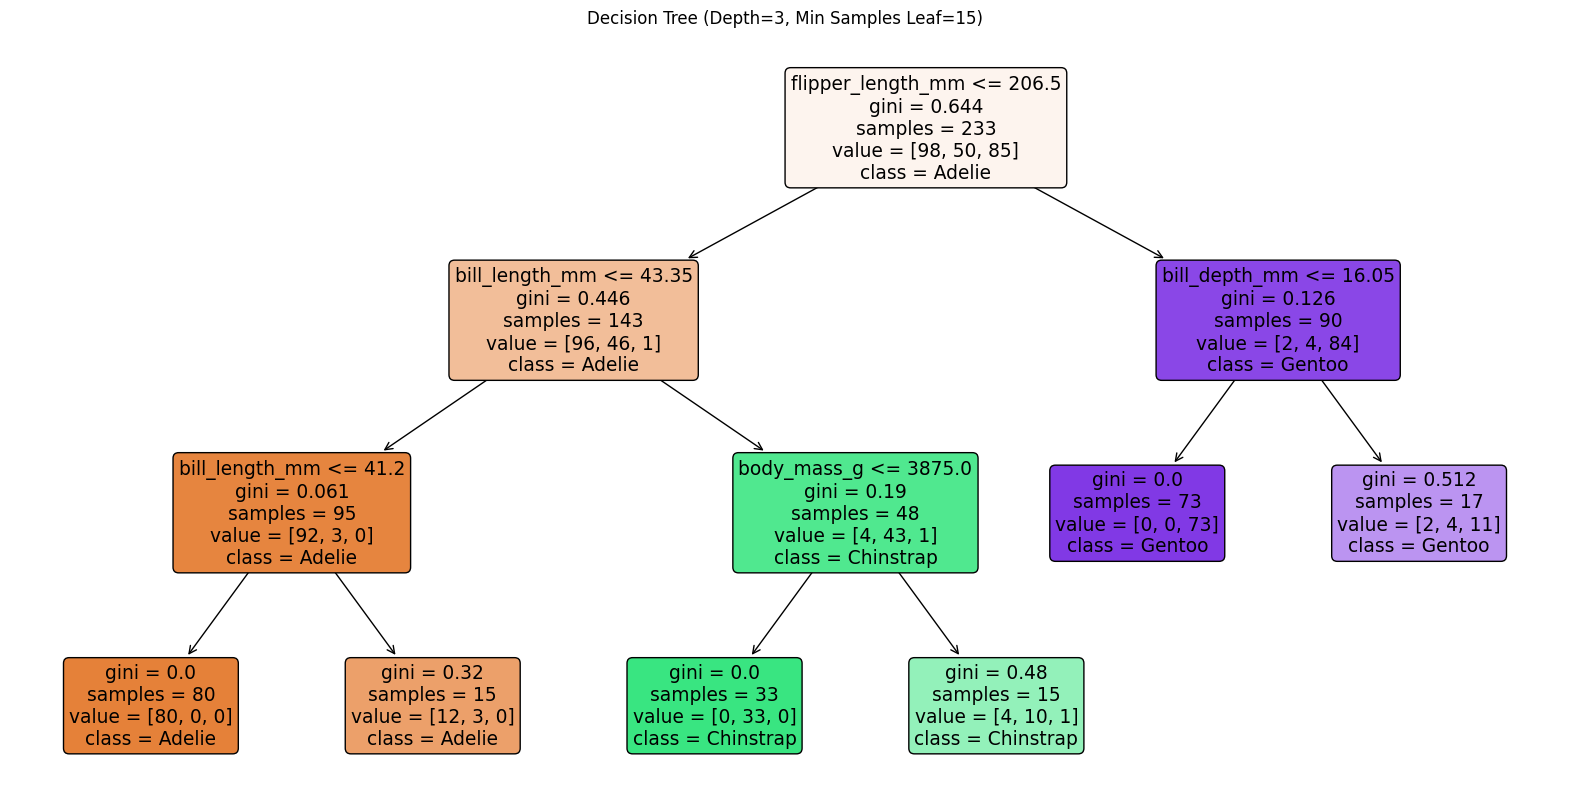

4. Results with maximum depth as 5 and least node size as 5:
Training Accuracy: 0.9700, Test Accuracy: 0.9800
{learned tree figure}


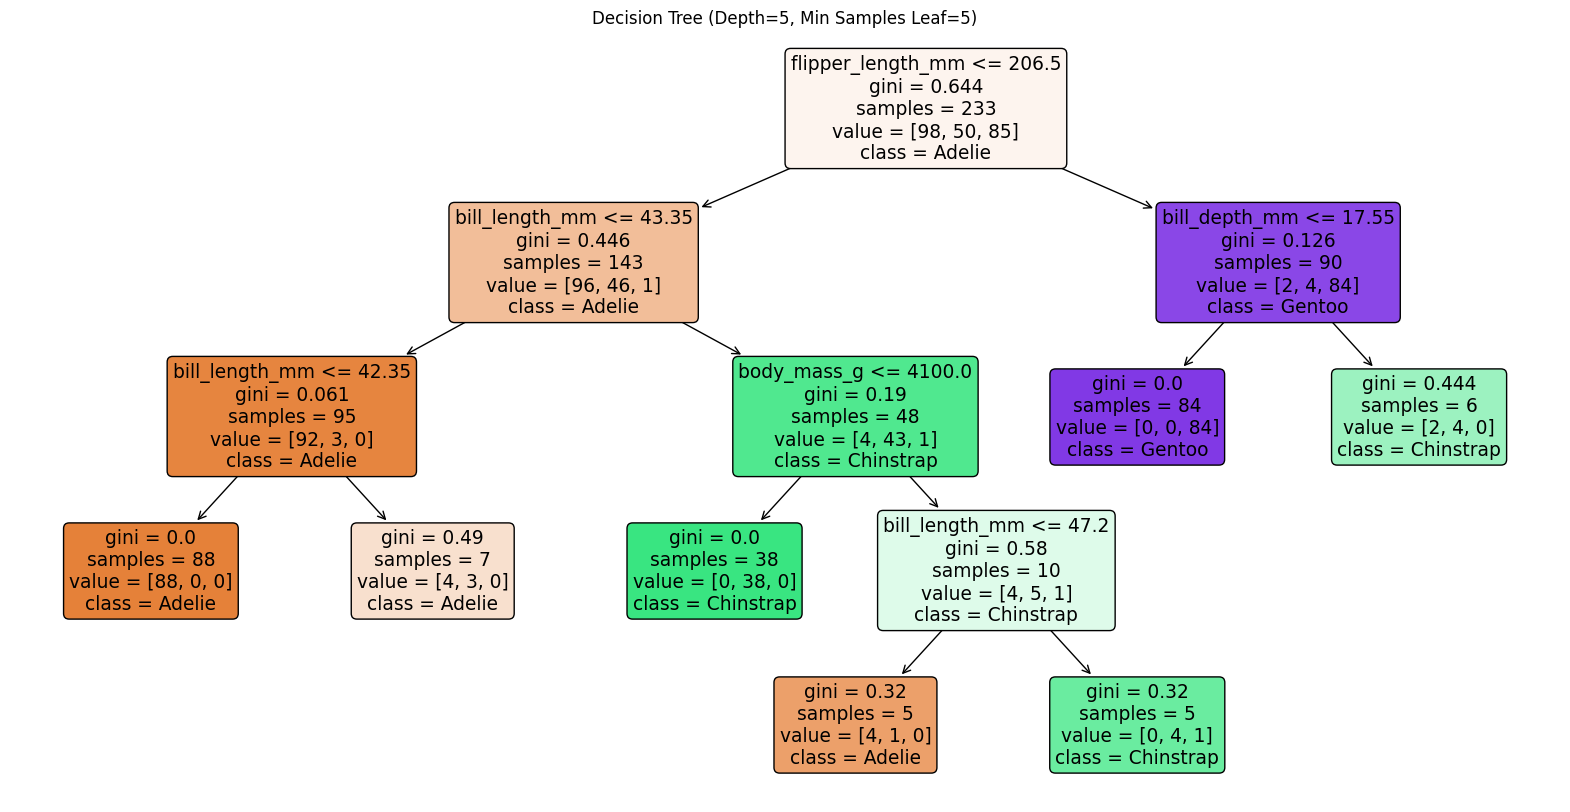

5. Results with maximum depth as 5 and least node size as 10:
Training Accuracy: 0.9399, Test Accuracy: 0.9700
{learned tree figure}


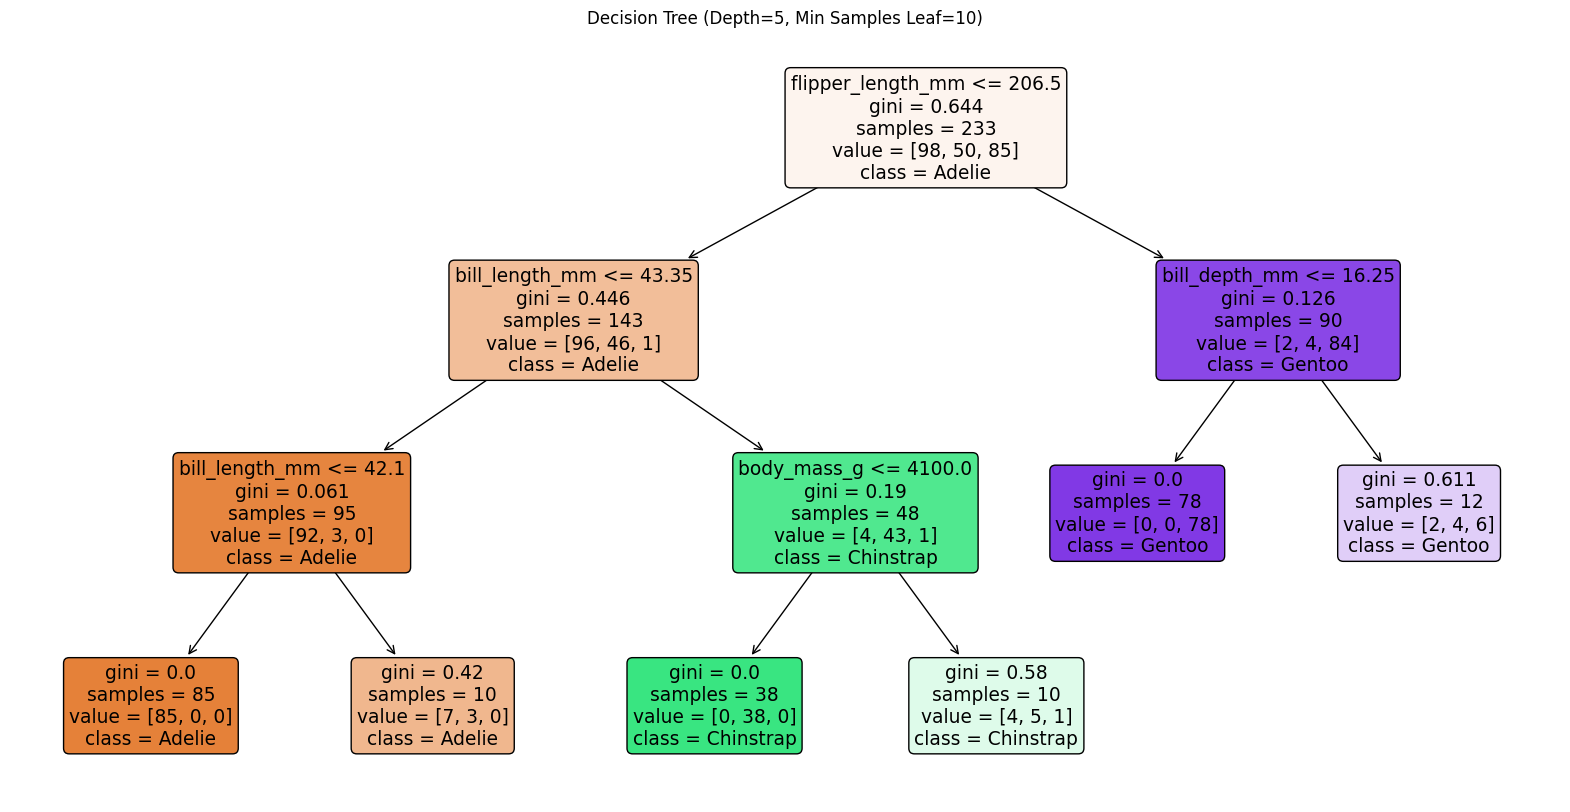

6. Results with maximum depth as 5 and least node size as 15:
Training Accuracy: 0.9399, Test Accuracy: 0.9700
{learned tree figure}


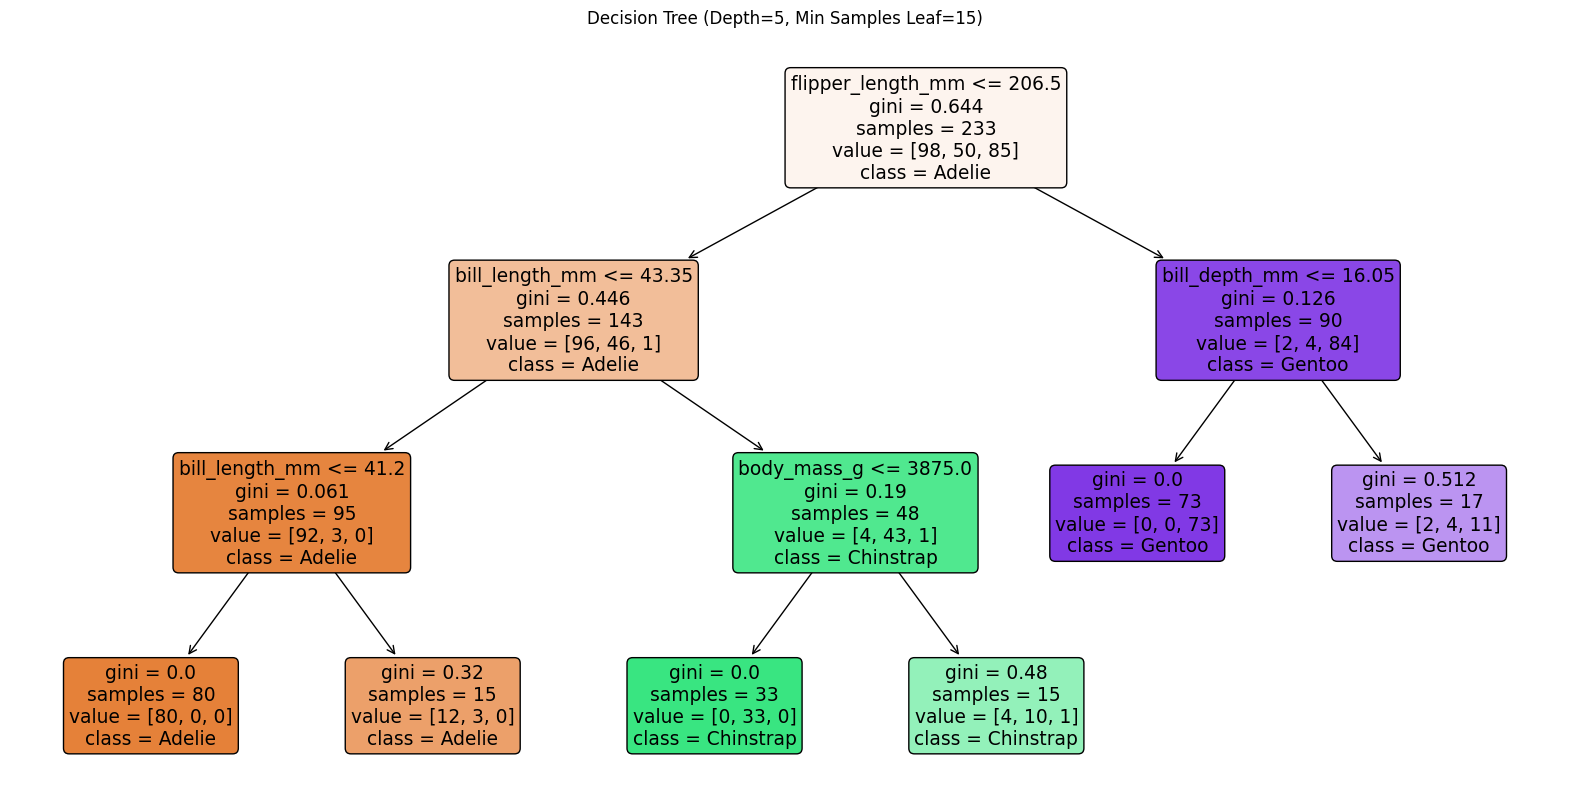

7. Results with maximum depth as 7 and least node size as 5:
Training Accuracy: 0.9700, Test Accuracy: 0.9800
{learned tree figure}


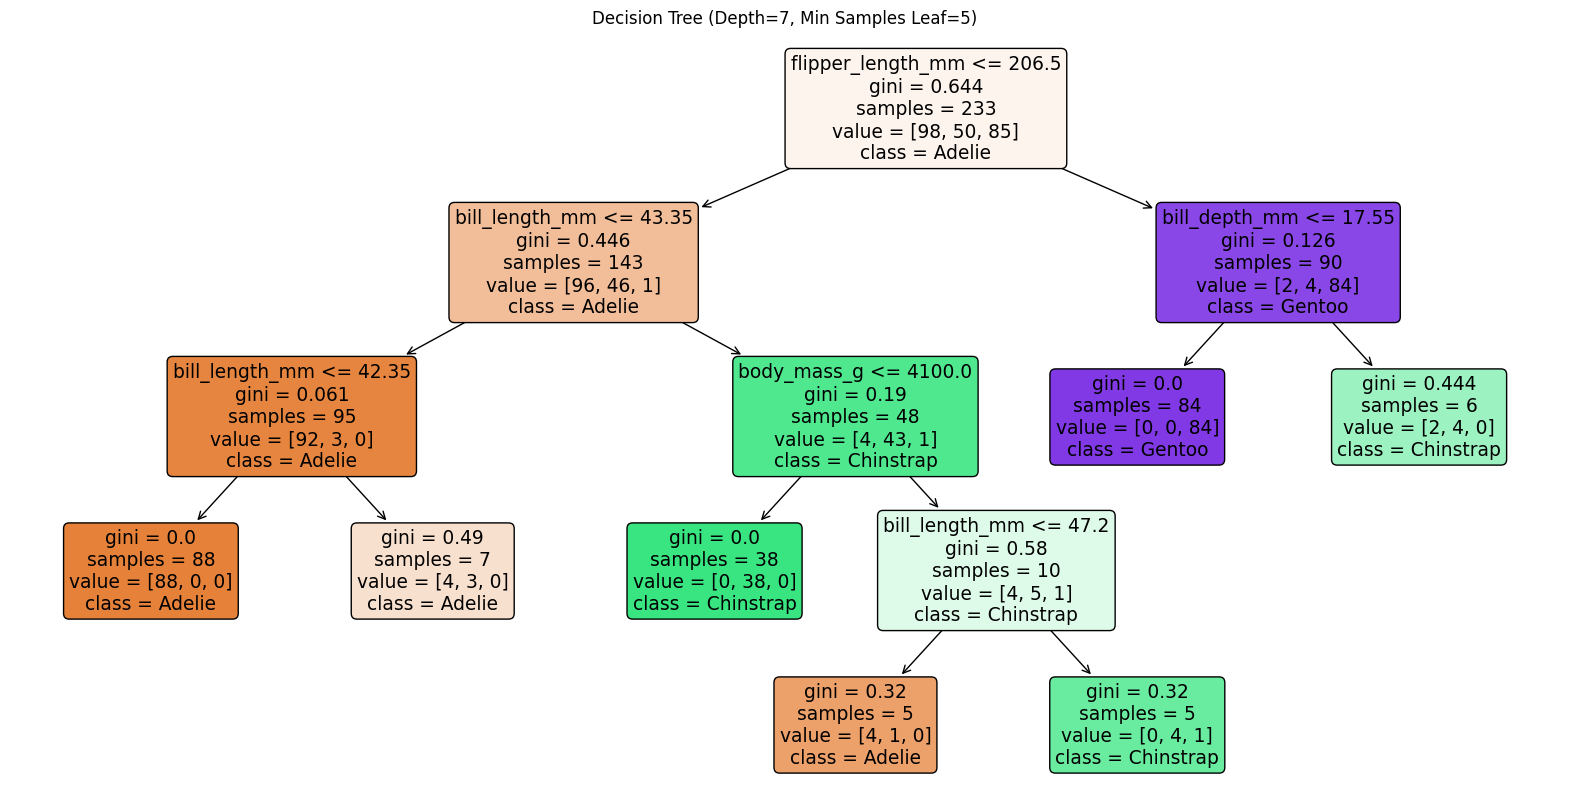

8. Results with maximum depth as 7 and least node size as 10:
Training Accuracy: 0.9399, Test Accuracy: 0.9700
{learned tree figure}


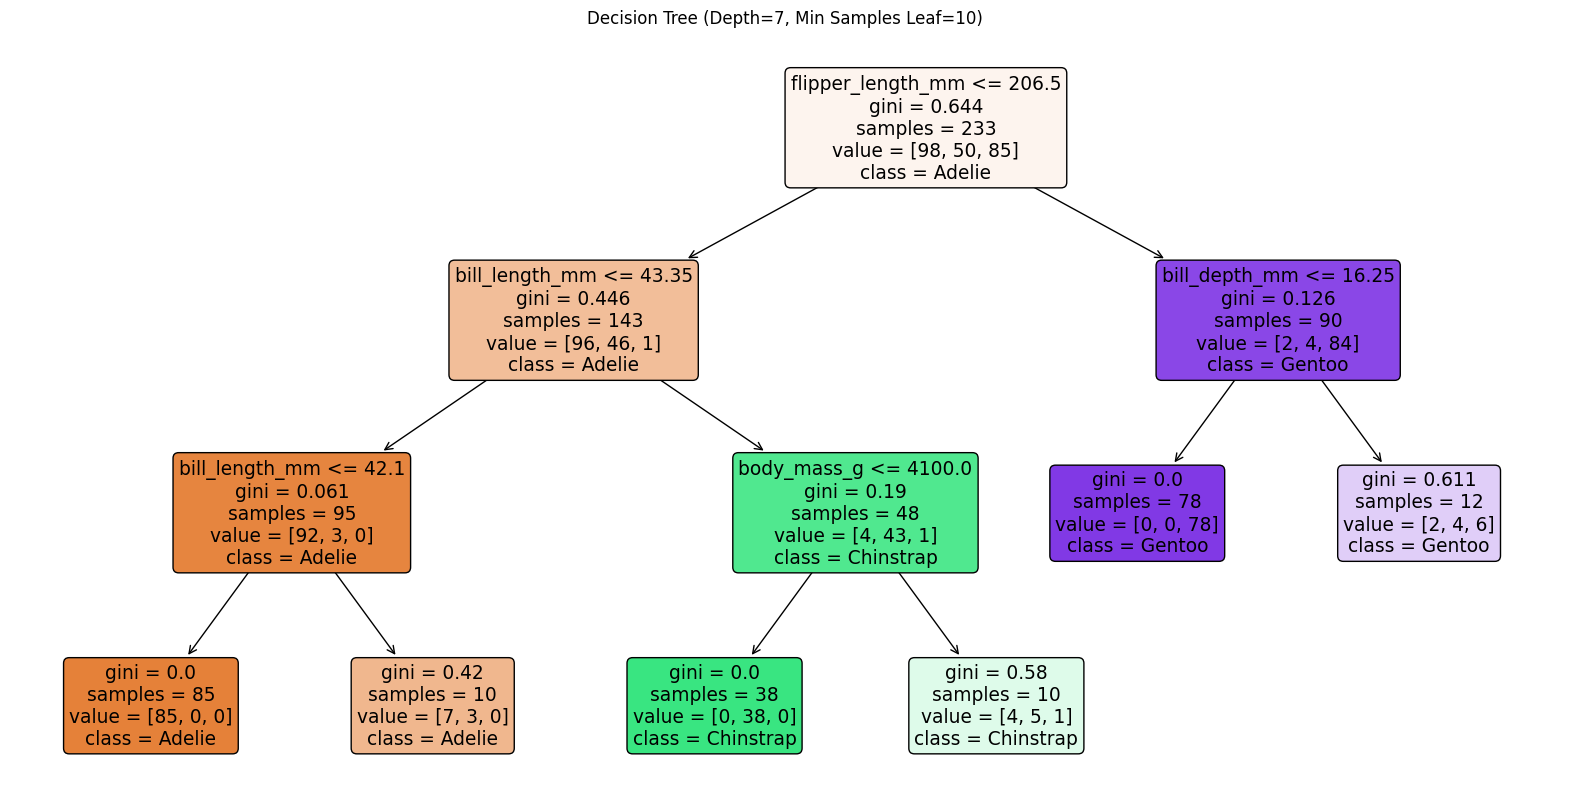

9. Results with maximum depth as 7 and least node size as 15:
Training Accuracy: 0.9399, Test Accuracy: 0.9700
{learned tree figure}


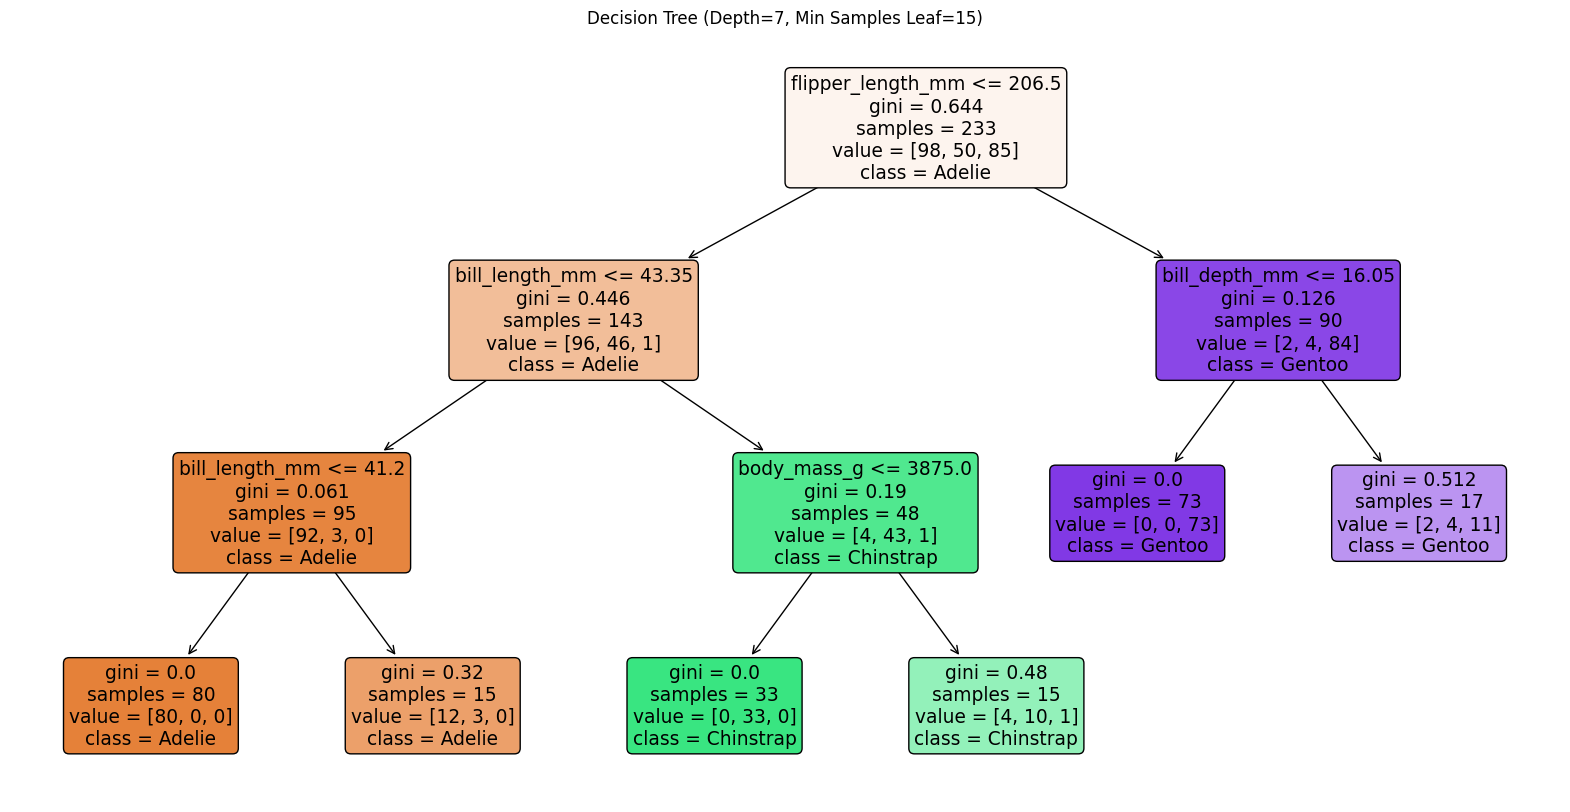

In [12]:

# Define hyperparameter values
depths = [3, 5, 7]  # Maximum depths: d1, d2, d3
min_samples = [5, 10, 15]  # Minimum samples per leaf: n1, n2, n3

print("Q2.1.3 Decision Tree:")

# Counter for result numbering
result_number = 1

# Train and evaluate decision trees with different parameters
for depth in depths:
    for min_sample in min_samples:
        # Initialize and train the decision tree classifier
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_sample, random_state=42)
        dt.fit(train_data.iloc[:, 1:], train_data['species'])
        
        # Predict on training and test sets
        train_preds = dt.predict(train_data.iloc[:, 1:])
        test_preds = dt.predict(test_data.iloc[:, 1:])
        
        # Calculate accuracy
        train_acc = accuracy_score(train_data['species'], train_preds)
        test_acc = accuracy_score(test_data['species'], test_preds)
        
        # Report results in the specified format
        print(f"{result_number}. Results with maximum depth as {depth} and least node size as {min_sample}:")
        print(f"Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
        print("{learned tree figure}")
        
        # Plot the tree
        plt.figure(figsize=(20, 10))
        plot_tree(
            dt,
            feature_names=train_data.columns[1:],  # Exclude the target column
            class_names=["Adelie", "Chinstrap", "Gentoo"],
            filled=True,
            rounded=True
        )
        plt.title(f"Decision Tree (Depth={depth}, Min Samples Leaf={min_sample})")
        plt.show()
        
        # Increment result number
        result_number += 1


In [13]:

# Define hyperparameter values
depths = [3, 5, 7]  # Maximum depths: d1, d2, d3
n_trees = [10, 50, 100]  # Number of trees: n1, n2, n3

print("Q2.1.4 Bagging of Trees:")

# Counter for result numbering
result_number = 1

# Train and evaluate Bagging models with different parameters
for max_depth in depths:
    for n_tree in n_trees:
        # Define base learner and bagging classifier
        base_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        bagging_model = BaggingClassifier(base_tree, n_estimators=n_tree, random_state=42)
        
        # Fit the model on training data
        bagging_model.fit(train_data.iloc[:, 1:], train_data['species'])
        
        # Calculate training and testing accuracy
        train_acc = accuracy_score(train_data['species'], bagging_model.predict(train_data.iloc[:, 1:]))
        test_acc = accuracy_score(test_data['species'], bagging_model.predict(test_data.iloc[:, 1:]))
        
        # Output results in the specified format
        print(f"{result_number}. Results with maximum depth as {max_depth} and number of trees as {n_tree}:")
        print(f"training accuracy: {train_acc:.4f}, test accuracy: {test_acc:.4f}")
        result_number += 1


Q2.1.4 Bagging of Trees:
1. Results with maximum depth as 3 and number of trees as 10:
training accuracy: 0.9785, test accuracy: 0.9800
2. Results with maximum depth as 3 and number of trees as 50:
training accuracy: 0.9785, test accuracy: 0.9900
3. Results with maximum depth as 3 and number of trees as 100:
training accuracy: 0.9785, test accuracy: 0.9800
4. Results with maximum depth as 5 and number of trees as 10:
training accuracy: 1.0000, test accuracy: 0.9900
5. Results with maximum depth as 5 and number of trees as 50:
training accuracy: 1.0000, test accuracy: 0.9900
6. Results with maximum depth as 5 and number of trees as 100:
training accuracy: 1.0000, test accuracy: 0.9900
7. Results with maximum depth as 7 and number of trees as 10:
training accuracy: 1.0000, test accuracy: 0.9900
8. Results with maximum depth as 7 and number of trees as 50:
training accuracy: 1.0000, test accuracy: 0.9900
9. Results with maximum depth as 7 and number of trees as 100:
training accuracy: 1.0

In [14]:

# Train random forests and evaluate
print("Q2.1.5 Random Forests:")
count = 1
for max_depth in depths:
    for n_tree in n_trees:
        rf_model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_tree, random_state=42)
        rf_model.fit(train_data.iloc[:, 1:], train_data['species'])

        # Predictions and accuracy
        train_acc = accuracy_score(train_data['species'], rf_model.predict(train_data.iloc[:, 1:]))
        test_acc = accuracy_score(test_data['species'], rf_model.predict(test_data.iloc[:, 1:]))

        # Output results in required format
        print(f"{count}. Results with maximum depth as {max_depth} and number of trees as {n_tree}:")
        print(f"training accuracy: {train_acc:.4f}, test accuracy: {test_acc:.4f}")
        count += 1


Q2.1.5 Random Forests:
1. Results with maximum depth as 3 and number of trees as 10:
training accuracy: 0.9828, test accuracy: 0.9800
2. Results with maximum depth as 3 and number of trees as 50:
training accuracy: 0.9785, test accuracy: 0.9800
3. Results with maximum depth as 3 and number of trees as 100:
training accuracy: 0.9742, test accuracy: 0.9800
4. Results with maximum depth as 5 and number of trees as 10:
training accuracy: 1.0000, test accuracy: 0.9900
5. Results with maximum depth as 5 and number of trees as 50:
training accuracy: 1.0000, test accuracy: 0.9900
6. Results with maximum depth as 5 and number of trees as 100:
training accuracy: 1.0000, test accuracy: 0.9900
7. Results with maximum depth as 7 and number of trees as 10:
training accuracy: 1.0000, test accuracy: 0.9900
8. Results with maximum depth as 7 and number of trees as 50:
training accuracy: 1.0000, test accuracy: 0.9900
9. Results with maximum depth as 7 and number of trees as 100:
training accuracy: 1.000

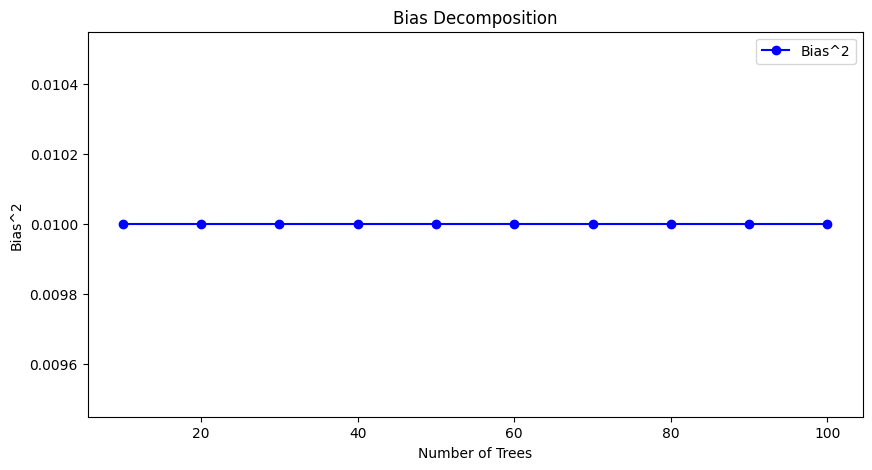

In [15]:

from mlxtend.evaluate import bias_variance_decomp

# Bias-variance decomposition for Random Forests
n_trees = list(range(10, 110, 10))
bias_list = []
variance_list = []

for n_tree in n_trees:
    rf = RandomForestClassifier(n_estimators=n_tree, random_state=42)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        rf, train_data.iloc[:, 1:].values, train_data['species'].values,
        test_data.iloc[:, 1:].values, test_data['species'].values,
        loss='0-1_loss', random_seed=42)
    bias_list.append(avg_bias)
    variance_list.append(avg_var)

# Plotting Bias
plt.figure(figsize=(10, 5))
plt.plot(n_trees, bias_list, label='Bias^2', marker='o', color='blue')
plt.xlabel('Number of Trees')
plt.ylabel('Bias^2')
plt.title('Bias Decomposition')
plt.legend()
plt.show()


The bias² doesn't change at all when we have between 10 and 100 trees; it stays at 0.01. This means that adding more trees won't make the model any better at matching the training data when it comes to bias. It's like the model has already learned all it can, and more trees won't help. This could be because the model is full, the data is just right as it is, or some settings like max_depth are keeping the model from learning more.

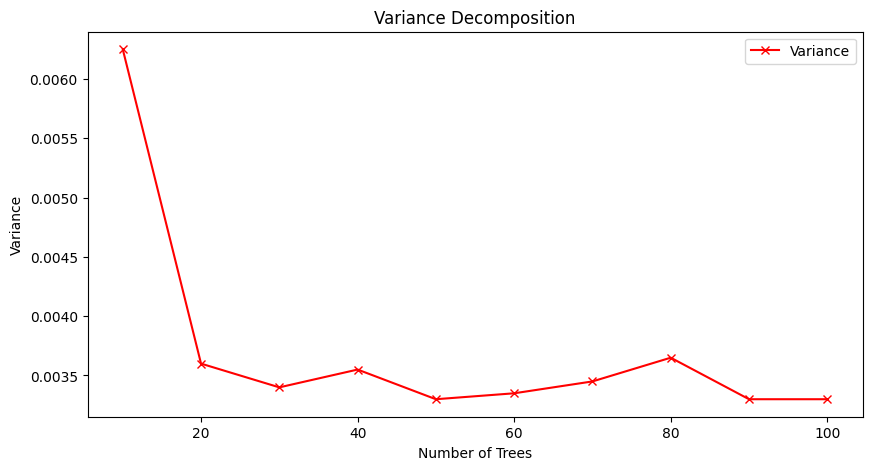

In [16]:

# Plotting Variance
plt.figure(figsize=(10, 5))
plt.plot(n_trees, variance_list, label='Variance', marker='x', color='red')
plt.xlabel('Number of Trees')
plt.ylabel('Variance')
plt.title('Variance Decomposition')
plt.legend()
plt.show()



As the number of trees in the Random Forest grows from 10 to 100, the variance of the model's predictions drops. This means the model's forecasts get more consistent. When the forest is small, the model is more affected by changes in the training data, causing higher variance. But as more trees are added, the model smooths out these changes, leading to lower variance.

However, after adding about 30 trees, the big drop in variance slows down. This suggests that while more trees do help, after a certain point, they don't make as much of a difference. It's a common pattern in ensemble methods like Random Forests: more trees up to a point make the model more stable, but then the benefits level off.